# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [22]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [23]:
def conv_fn (x, h):
    total_len = len(x) + 2*len(h)
    pad = np.zeros(total_len)
    pad[0:len(x)] = x[0:len(x)]
    y = np.zeros((total_len,))
    
    for i in range(0,len(pad)):
        for j in range (0, len(h)):
            y[i] += pad[i-j] * h[j]
    return y
        


In [24]:

def dirac(n=0, N=20):
    s = np.zeros((N,))
    s[n] = 1
    return s

def step (n=0, N=20):
    s = np.zeros((N,))
    for idx in np.arange(n, N):
        s[idx] = 1
    return s

def exp (n=0, N=20):
    s = np.zeros((N,))
    e = 2.718
    for incr, idx in enumerate (np.arange(n, N)):
        s[idx] = e ** incr
    return s


x = np.array([1, 2, 3, 4])
h1 = dirac(0,5)
h2 = step(0,5)
h3 = exp(0,5)
h4 = np.array([-1, 1])
print ('my answer: (dirac filtering) ')
print (conv_fn(x, h1))
print ('solution: (dirac filtering) ')
print (np.convolve(x,h1))
print ('my answer: (step filtering) ')
print (conv_fn(x, h2))
print ('solution: (step filtering) ')
print (np.convolve(x,h2))
print ('my answer: (exp filtering) ')
print (conv_fn(x, h3))
print ('solution: (exp filtering) ')
print (np.convolve(x,h3))
print ('my answer: ([-1,1] filtering) ')
print (conv_fn(x, h4))
print ('solution: ([-1,1] filtering) ')
print (np.convolve(x,h4))

my answer: (dirac filtering) 
[ 1.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
solution: (dirac filtering) 
[ 1.  2.  3.  4.  0.  0.  0.  0.]
my answer: (step filtering) 
[  1.   3.   6.  10.  10.   9.   7.   4.   0.   0.   0.   0.   0.   0.]
solution: (step filtering) 
[  1.   3.   6.  10.  10.   9.   7.   4.]
my answer: (exp filtering) 
[   1.            4.718        15.823524     47.00833823  127.76866331
  198.9389884   244.04369348  218.3020434     0.            0.            0.
    0.            0.            0.        ]
solution: (exp filtering) 
[   1.            4.718        15.823524     47.00833823  127.76866331
  198.9389884   244.04369348  218.3020434 ]
my answer: ([-1,1] filtering) 
[-1. -1. -1. -1.  4.  0.  0.  0.]
solution: ([-1,1] filtering) 
[-1 -1 -1 -1  4]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


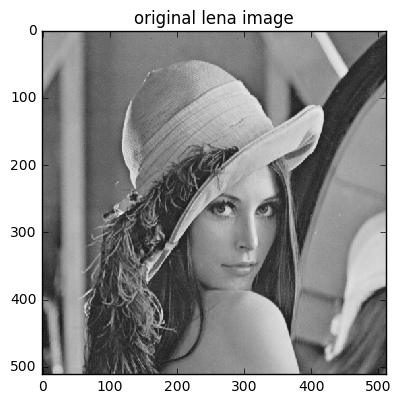

C:\Users\whkj\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


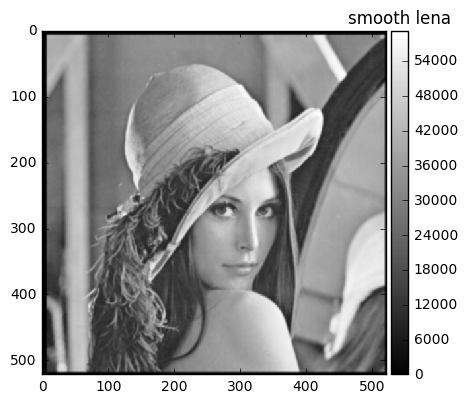

In [25]:
def conv_2D (x, k):
    total_r = x.shape[0] + 2*k.shape[0]
    total_c = x.shape[1] + 2*k.shape[1]
    pad = np.zeros((total_r, total_c))
    pad[k.shape[0]:k.shape[0]+x.shape[0], k.shape[1]:k.shape[1]+x.shape[1]] = x[:,:]
    y = np.zeros((total_r, total_c))
    
    for n1 in range(0, pad.shape[0]):
        for n2 in range(0, pad.shape[1]):
            for k1 in range(0, k.shape[0]):
                for k2 in range(0, k.shape[1]):
                    y[n1,n2] += pad[n1-k1, n2-k2]* k[k1,k2]
    return y

path = '../images/'
lena_img = io.imread(path.__add__('lena-grey.bmp'))
#print (lena_img.shape)
plt.figure
io.imshow(lena_img)
plt.title('original lena image')
plt.show()

#k = 1./256 * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
k =  np.array(np.mat('1 4 6 4 1; 4 16 24 16 4 ; 6 24 36 24 6 ; 4 16 24 16 4; 1 4 6 4 1'))
conv_lena = conv_2D (lena_img, k)
plt.figure
io.imshow(conv_lena, cmap = plt.cm.gray)
plt.title('smooth lena')
plt.show()
    


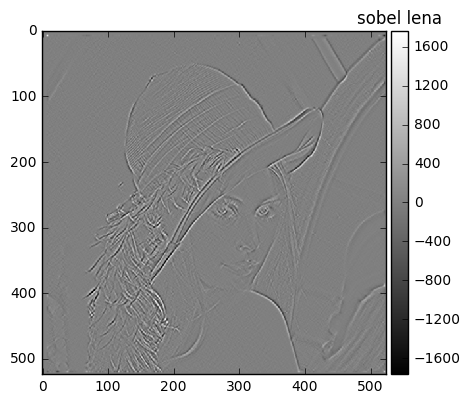

In [26]:
sobel_h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_v = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

sobel_lena = conv_2D(conv_2D(lena_img, sobel_h), sobel_v)
plt.figure
io.imshow(sobel_lena,cmap = plt.cm.gray)
plt.title('sobel lena')
plt.show()

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

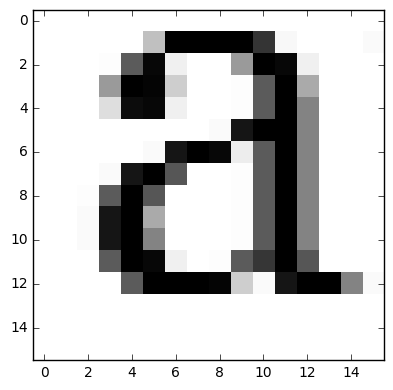

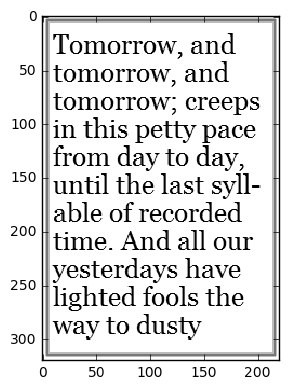

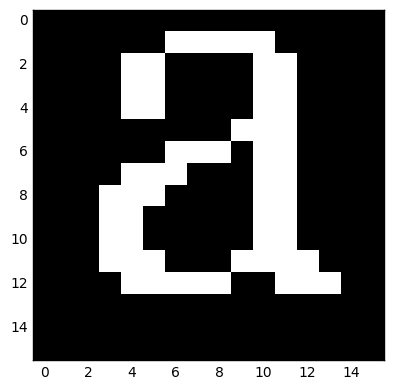

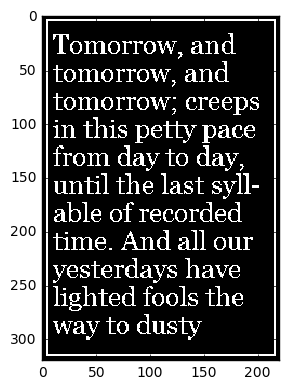

In [27]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

#read image 'a' and show
a_img = io.imread (path.__add__('a.png'))
a_img = rgb2gray (a_img)
plt.figure
io.imshow(a_img)
plt.show()

#read image 'text' and show
text_img = io.imread (path.__add__('text.png'))
text_img = rgb2gray (text_img)
plt.figure
io.imshow(text_img)
plt.show()

#binarized image 'a'
thresh_a = threshold_otsu(a_img)
for i in range (0, a_img.shape[0]):
    for j in range (0, a_img.shape[1]):
        if (a_img[i,j] > thresh_a ):
            a_img [i,j] = 0
        else:
            a_img [i,j]  = 1

plt.figure
io.imshow(a_img)
plt.show()

#binarized image 'text'
thresh_text = threshold_otsu(text_img)
for i in range (0, text_img.shape[0]):
    for j in range (0, text_img.shape[1]):
        if (text_img[i,j] > thresh_text ):
            text_img [i,j] = 0
        else:
            text_img [i,j]  = 1

plt.figure
io.imshow(text_img)
plt.show()



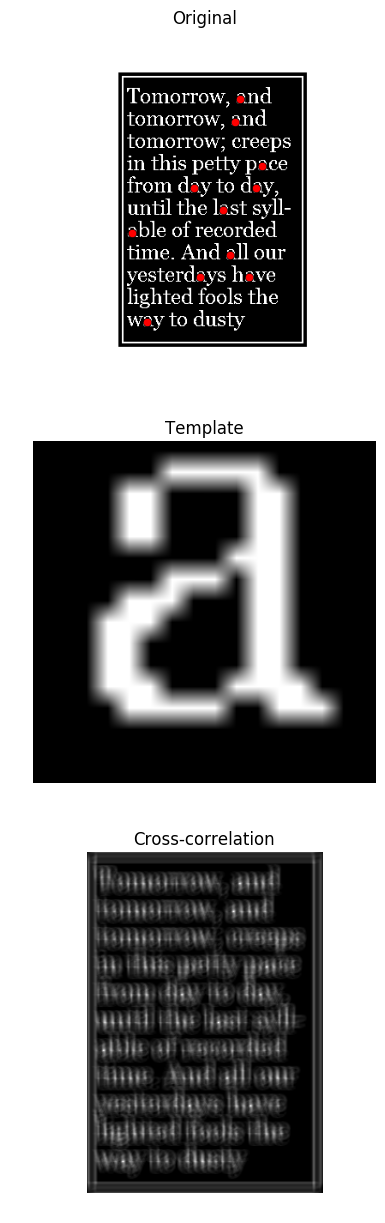

In [32]:
from scipy import signal

corr = signal.correlate2d(text_img, a_img,'same', 'symm')

fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1, figsize=(6, 15))

ax_orig.imshow(text_img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(a_img, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

for i in range(0,11):
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    ax_orig.plot(x, y, 'ro')
    corr[y,x]=0

